# B"H

---

## The **`pandas-gbq`** library

- https://pandas-gbq.readthedocs.io/en/latest/reading.html
- https://pandas-gbq.readthedocs.io/en/latest/api.html
- https://pandas-gbq.readthedocs.io/en/latest/howto/authentication.html

---

In [17]:
import numpy as np
import pandas as pd
import pandas_gbq

from google.oauth2 import service_account

import matplotlib.pyplot as plt

import seaborn as sns

In [18]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [12.0, 9.0]
Current size: [12, 9]


---
### Prerequisite Step 1 - configure the settings that should last throughout the session
- credentials
- project
- sql dialect

In [3]:
credentials = service_account.Credentials.from_service_account_file(
    '/home/laz/app-keys/data-science-course-a1544568093e.json'
)

In [4]:
pandas_gbq.context.credentials = credentials
pandas_gbq.context.project     = 'data-science-course-226116'
pandas_gbq.context.dialect     = 'standard'

---
### Run SQL query and pull the data into a DataFrame

In [5]:
configuration = {
   'query': {
     "useQueryCache": False
   }
}

In [60]:
sql = """
SELECT   account, campaign, year, day, cost, clicks
FROM     sql_lessons.google_ads_etl_step_2
where    account in ('TSO.COM', 'Bridger Eyecare', 'Yesnick Vision Center', 'TSO - Dowlen')
  and    cost > 0
""" 

In [61]:
df = pandas_gbq.read_gbq(
    query         = sql,         
    configuration = configuration    
)

In [62]:
df.head()

,account,campaign,year,day,cost,clicks
0,TSO.COM,Search Ads - Live - HMC,2018,2018-05-02,1.52,1
1,TSO.COM,Search Ads - Live - HMC,2018,2018-03-09,1.6,1
2,TSO.COM,Search Ads - Live - HMC,2018,2018-05-03,2.84,1
3,TSO.COM,Search Ads - Live - HMC,2018,2018-05-30,0.17,1
4,TSO.COM,Search Ads - Live - HMC,2018,2018-03-16,0.88,1


In [63]:
df['cost'] = pd.to_numeric(df['cost'])

---

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14791 entries, 0 to 14790
Data columns (total 6 columns):
account     14791 non-null object
campaign    14791 non-null object
year        14791 non-null int64
day         14791 non-null datetime64[ns]
cost        14791 non-null float64
clicks      14791 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 693.4+ KB


---

### Do simple line-plot:

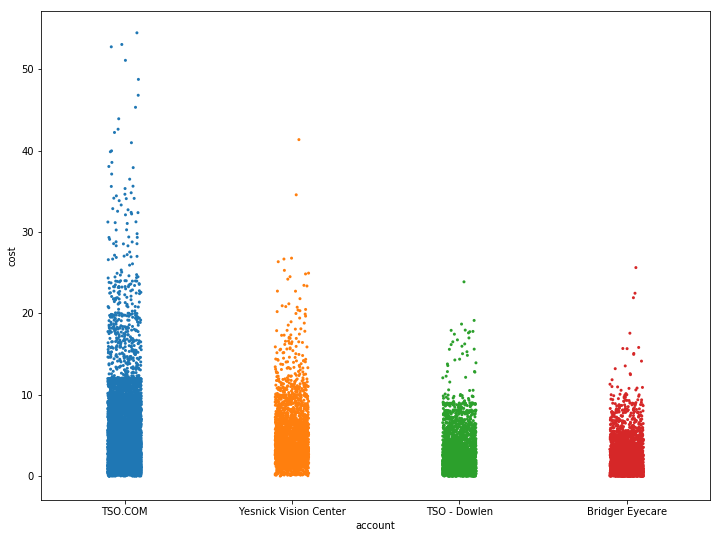

In [65]:
sns.stripplot(
    x      = 'account', 
    y      = 'cost', 
    data   = df, 
    size   = 3, 
    jitter = True
)


plt.show()

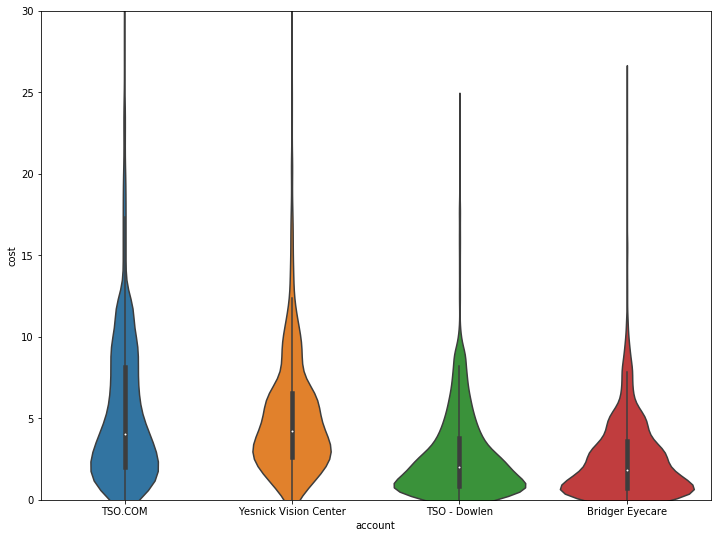

In [71]:
sns.violinplot(
    x    = 'account', 
    y    = 'cost', 
    data = df
)

plt.ylim(0,30)

plt.show()